In [ ]:
!pip install konlpy
!apt-get update -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 40.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
%config InlineBackend.figure_format='retina'
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = 'C:/Windows/Fonts/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

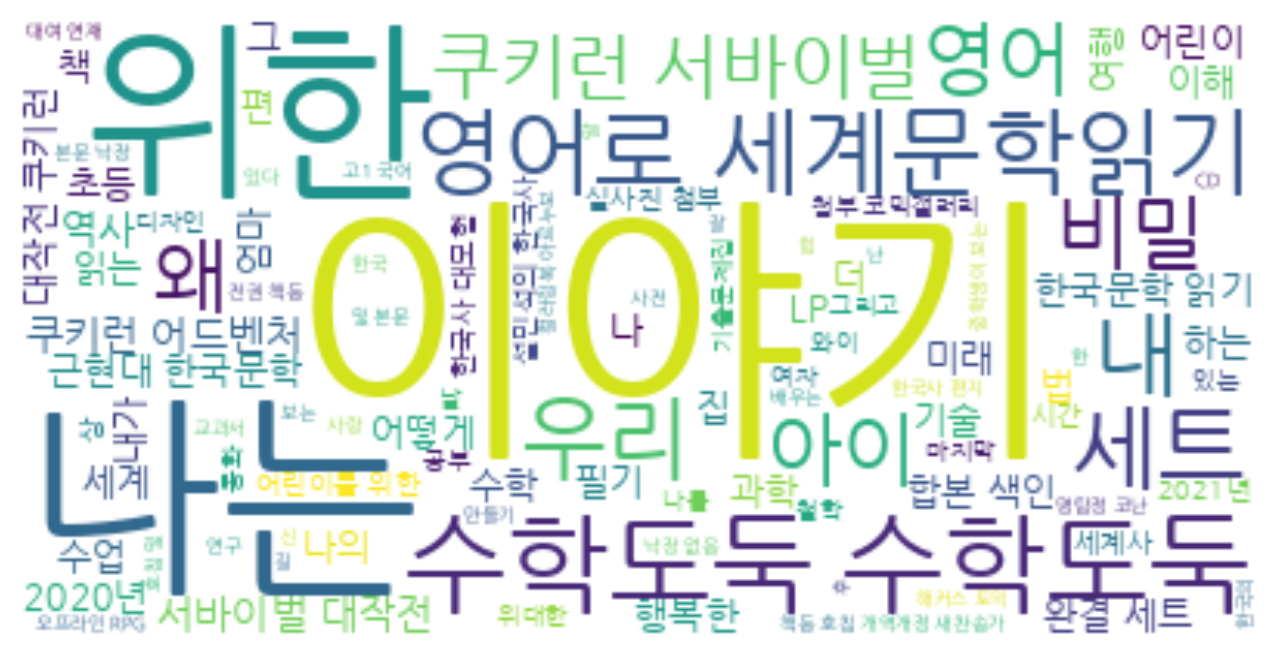

In [ ]:
# Load dataset
df = pd.read_csv('/content/book.csv', encoding='euc-kr')

# Remove missing values
df = df.dropna(subset=['Title'])
df = df[df['Title'].str.strip() != '']

# Filter Korean title
def filter_korean_titles(df):
    return df[df['Title'].str.contains('[가-힣]', regex=True)]

# Create dataframe with Korean title
df_kor = filter_korean_titles(df)

FONT_PATH = 'NanumGothic.ttf'

# Make word cloud
def create_wordcloud(df):
    text = " ".join(title for title in df['Title'])
    wordcloud = WordCloud(background_color='white', font_path=FONT_PATH).generate(text)
    plt.rc('font', family='NanumBarunGothic')
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
create_wordcloud(df_kor)

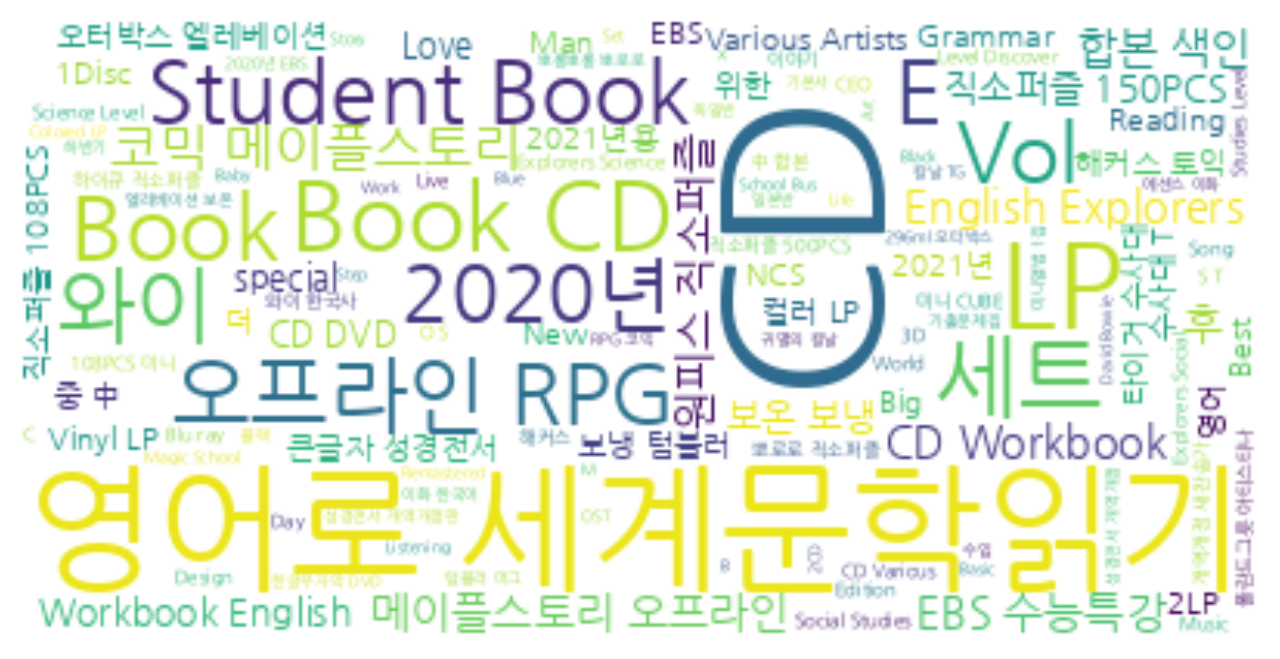

In [ ]:
# Filter English title
def filter_english_titles(df):
    return df[df['Title'].str.contains('[A-Za-z]', regex=True)]

# Create dataframe with English title
df_eng = filter_english_titles(df)

# Create wordcloud
create_wordcloud(df_eng)

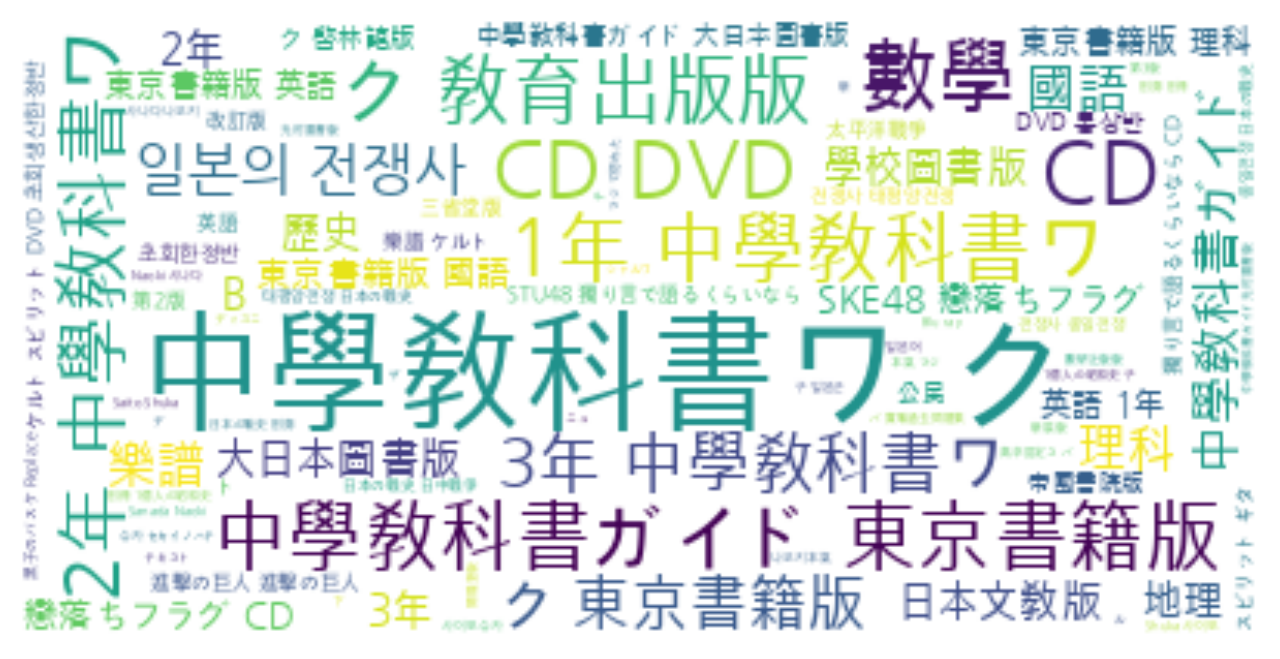

In [ ]:
# Filter Japanese title
def filter_japanese_titles(df):
    return df[df['Title'].str.contains('[ぁ-んァ-ン]', regex=True)]

# Create dataframe with Japanese title
df_jap = filter_japanese_titles(df)

# Create wordcloud
create_wordcloud(df_jap)